# Assignment 2  <font color="blue"> (15 points) </font>
Due on 02/12/2019, at 10 PM
***

### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. In case there are multiple libraries that can be used for the same purpose, you might import and use any one you wish unless otherwise stated. 
  + Name variables and functions as requested.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TA's or instructors. 
  
  Good luck! 

In [ ]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [ ]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb 
from sklearn.preprocessing import scale
from collections import Counter
from sklearn import linear_model
from sklearn import datasets
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [ ]:
L = [0,1,2,3,4,5,6,7]
L.insert(2,5)
print(L)

[0, 1, 5, 2, 3, 4, 5, 6, 7]


1.  <font color=blue> (0.5 points) </font> Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. 
2.  <font color=blue> (1.5 point) </font> Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
3.  <font color=blue> (0.5 points)</font> Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
4.  <font color=blue> (1.5 points) </font> Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
5. <font color=blue> (2 points) </font> Applying linear regression, model `Balance` simultaneously based on 
  `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`.
6. <font color=blue> (1 point) </font> Using the obtained model, compare the independent variables effect size on the response?  
7.  <font color=blue> (6 points) </font> Model `Balance_1500` by the explanatory variables mentionned in Step 5 using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. <font color=blue> (0.5 points) </font> Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

Compare the probabilities and comment.
    
9. <font color=blue> (1.5 points) </font> For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [ ]:
#1)
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [ ]:
credit_data = pd.read_csv('Credit.csv')

credit_data = credit_data.drop('Unnamed: 0',axis=1)


credit_data['student_factor'] = credit_data.Student.factorize()[0]
credit_data['married_factor'] = credit_data.Married.factorize()[0]

credit_data.head() #leaving between blank will give first 5 by default




,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,student_factor,married_factor
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

[Text(0, 1, 'Income'),
 Text(0, 1, 'Limit'),
 Text(0, 1, 'Rating'),
 Text(0, 1, 'Cards'),
 Text(0, 1, 'Age'),
 Text(0, 1, 'Education'),
 Text(0, 1, 'Gender'),
 Text(0, 1, 'Student'),
 Text(0, 1, 'Married'),
 Text(0, 1, 'Ethnicity'),
 Text(0, 1, 'Balance'),
 Text(0, 1, 'student_factor'),
 Text(0, 1, 'married_factor')]

[Text(0, 0, 'Income'),
 Text(0, 0, 'Limit'),
 Text(0, 0, 'Rating'),
 Text(0, 0, 'Cards'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Gender'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Ethnicity'),
 Text(0, 0, 'Balance'),
 Text(0, 0, 'student_factor'),
 Text(0, 0, 'married_factor')]

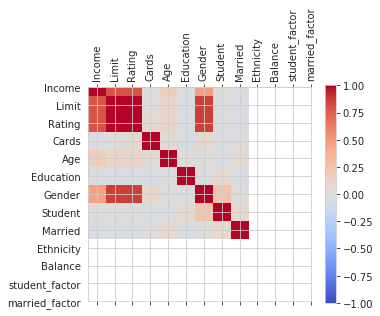

In [ ]:
#2) to do afterwards
corr = credit_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(credit_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(credit_data.columns)
ax.set_yticklabels(credit_data.columns)
plt.show()
#this gives basic correlation chart

Text(0.5, 1.0, 'Correlation between Income and Balance')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Balance')

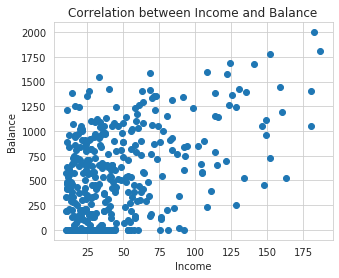

In [ ]:
inc = credit_data['Income']
bal = credit_data['Balance']
lim = credit_data['Limit']
ag = credit_data['Age']
rat = credit_data['Rating']
car = credit_data['Cards']


plt.scatter(inc,bal)
plt.title('Correlation between Income and Balance')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()

Text(0.5, 1.0, 'Correlation between Limit and Balance')

Text(0.5, 0, 'Limit')

Text(0, 0.5, 'Balance')

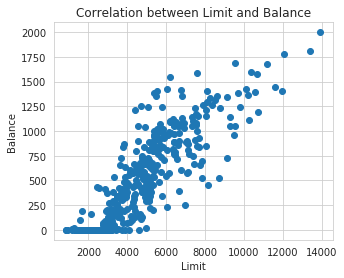

In [ ]:
plt.scatter(lim,bal)
plt.title('Correlation between Limit and Balance')
plt.xlabel('Limit')
plt.ylabel('Balance')
plt.show()

Text(0.5, 1.0, 'Correlation between Age and Balance')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Balance')

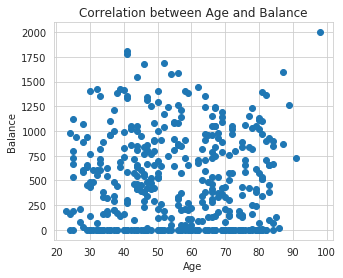

In [ ]:
plt.scatter(ag,bal)
plt.title('Correlation between Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

Text(0.5, 1.0, 'Correlation between Rating and Balance')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Balance')

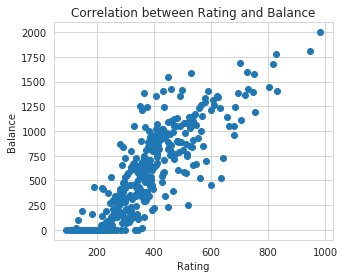

In [ ]:
plt.scatter(rat,bal)
plt.title('Correlation between Rating and Balance')
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.show()

Text(0.5, 1.0, 'Correlation between Cards and Balance')

Text(0.5, 0, 'Cards')

Text(0, 0.5, 'Balance')

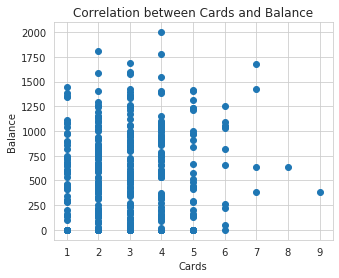

In [ ]:
plt.scatter(car,bal)
plt.title('Correlation between Cards and Balance')
plt.xlabel('Cards')
plt.ylabel('Balance')
plt.show()

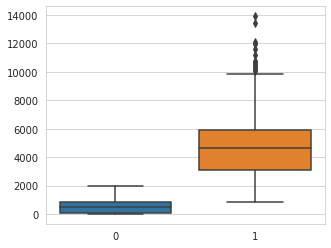

In [ ]:
sb.boxplot(data=[bal,lim])


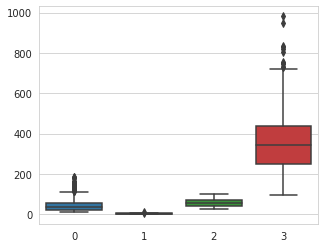

In [ ]:
sb.boxplot(data=[inc,car,ag,rat])

#
2) The correlation graph helps give an idea of which variables are correlated with eachother in the early stages of data analysis. Seeing as Balance would be our response variable in the regression part; scatterplots were constructed to visualize correlation with other variables. We can see clear linear relaionships between rating and balance and limit and balance. Income vs balance overall is linear but more convoluted within the 50k-100k showing no clear relationship for that range. No clear correlation with age vs balance or card vs balance. A boxplot was plotted to compare each variable side by side. 

In [ ]:
#3)Income, Limit, Rating, Cards, Age, Education, and Balance 
credit_data_2 = credit_data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]

print(credit_data_2)
print(credit_data_2.shape)
print(credit_data_2.size)
print(credit_data_2.ndim)

      Income  Limit  Rating  Cards  Age  Education  Balance
0     14.891   3606     283      2   34         11      333
1    106.025   6645     483      3   82         15      903
2    104.593   7075     514      4   71         11      580
3    148.924   9504     681      3   36         11      964
4     55.882   4897     357      2   68         16      331
..       ...    ...     ...    ...  ...        ...      ...
395   12.096   4100     307      3   32         13      560
396   13.364   3838     296      5   65         17      480
397   57.872   4171     321      5   67         12      138
398   37.728   2525     192      1   44         13        0
399   18.701   5524     415      5   64          7      966

[400 rows x 7 columns]
(400, 7)
2800
2


the dimension is 2

In [ ]:
#4)Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.



credit_data_2.loc[(credit_data_2['Balance']) > 1500,'Balance_1500'] = 1
credit_data_2.loc[(credit_data_2['Balance']) <= 1500,'Balance_1500'] = 0

credit_data_2.head()









/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0.0
1,106.025,6645,483,3,82,15,903,0.0
2,104.593,7075,514,4,71,11,580,0.0
3,148.924,9504,681,3,36,11,964,0.0
4,55.882,4897,357,2,68,16,331,0.0


In [ ]:
#)5 Applying linear regression, model Balance simultaneously based on Income, Limit, Rating, Cards, Age, Education.



indep = credit_data_2[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
dep1 = credit_data_2[['Balance']]




X = indep
y = dep1

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

prediction = lm.predict(X)
print(prediction[0:10])
print(y[0:10])

lm.coef_

lm.intercept_

lm.score(X,y)







[[ 461.9946547 ]
 [ 545.03194423]
 [ 687.34197438]
 [1022.1592906 ]
 [ 446.97635876]
 [1100.30151481]
 [ 338.22396164]
 [ 897.47936788]
 [ 396.8574197 ]
 [ 892.27548092]]
   Balance
0      333
1      903
2      580
3      964
4      331
5     1151
6      203
7      872
8      279
9     1350


array([[-7.55803661,  0.12585115,  2.06310071, 11.59155799, -0.89239775,
         1.99828255]])

array([-477.9580884])

0.878245293186235

6) *Using the obtained model, compare the independent variables effect size on the response?*
the coefficients are the slopes of our linear regression line created by the model. If we look at cards for example, our coefficient states that for each additional card one has we can expect the balance to go up by an average of 11.591. Looking at our results, our variable with highest effect size was card amount and our variable with the smallest effect size is the limit of the card.  The larger the number the greater the effect size.

In [ ]:
#7)Model Balance_1500 by the explanatory variables mentionned in Step 5 using the following models:
#a)logistic regression,
#b)linear discriminant, and
#c)quadratic discriminant.
#a)
dep2 = credit_data_2[['Balance_1500']]

y_2 = dep2
lr = LogisticRegression()
lr.fit(X, y_2)

print(lr.intercept_)
print(lr.coef_)






/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[-0.8120415]
[[-0.00950267  0.0049973  -0.05902321  0.11890952 -0.05978754 -0.35416642]]


In [ ]:
#7)b)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_3 = dep2
lda = LinearDiscriminantAnalysis()
lda.fit(X,y_3)

print(lda.intercept_)
print(lda.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

[-14.25754044]
[[ 2.50503328e-02 -2.46350024e-04  1.90771457e-02  2.92958512e-01
  -1.61624107e-02 -1.68504978e-02]]


In [ ]:
#7c) 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
y_4 = dep2
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y_4)




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
#8)Find the probability of (Balance  >1500 ), for the following values, using all three aforementionned methods:
#Income	Limit	Rating	Cards	Age	Education
#63	    8100	600	      4	   30	 13
#186	  13414	950	      2	   41	 13

# a) logReg prob

lr_right_eq1 = lr.intercept_ + 63*lr.coef_[0][0] + 8100*lr.coef_[0][1] + 600*lr.coef_[0][2] + 4*lr.coef_[0][3] + 30*lr.coef_[0][4] + 13*lr.coef_[0][5]
lr_right_eq2 = lr.intercept_ + 186*lr.coef_[0][0] + 13414*lr.coef_[0][1] + 950*lr.coef_[0][2] + 2*lr.coef_[0][3] + 41*lr.coef_[0][4] + 13*lr.coef_[0][5]
prob_bal_1500_1 = np.exp(lr_right_eq1)/(1+np.exp(lr_right_eq1))
prob_bal_1500_2 = np.exp(lr_right_eq2)/(1+np.exp(lr_right_eq2))
print(prob_bal_1500_1)
print(prob_bal_1500_2)
print(prob_bal_1500_1*100)
print(prob_bal_1500_2*100)

[0.09375341]
[0.82701017]
[9.37534074]
[82.70101671]


In [ ]:
#b)
ldaXa = pd.DataFrame([[63,8100,600,4,30,13]])
yProb1_lda = lda.predict_proba(ldaXa)

ldaXb = pd.DataFrame([[186,13414,950,2,41,13]])
yProb2_lda = lda.predict_proba(ldaXb)

print(yProb1_lda)
print(yProb2_lda)
print(yProb1_lda*100)
print(yProb2_lda*100)
#the matrix represents the probability of obtaining a 0 or 1(balance<=1500 or balance>1500)therefore there is a 5.95%chance of balance>1500 for
#the first set of independent variables and 99.28% chance for the second set




[[0.94050988 0.05949012]]
[[0.00721199 0.99278801]]
[[94.05098848  5.94901152]]
[[ 0.72119891 99.27880109]]


In [ ]:
#c)
yProb1_qda = qda.predict_proba(ldaXa)

yProb2_qda = qda.predict_proba(ldaXb)

print(yProb1_qda)
print(yProb2_qda)
print(yProb1_qda*100)
print(yProb2_qda*100)

[[9.99999995e-01 4.93626009e-09]]
[[7.83057752e-04 9.99216942e-01]]
[[9.99999995e+01 4.93626009e-07]]
[[7.83057752e-02 9.99216942e+01]]


#
8) **set 1**: logistic regression= 9.375% chance, linear discriminant analysis= 5.959% chance, quadratic discriminant analysis= 4.936e-7% chance.

**set 2**: logistic regression= 82.701% chance, linear discriminant analysis= 99.279% chance, quadratic discriminant analysis= 99.922% chance.

All three models show a small chance of the balance being greater than 1500 for the first set. For the second set all three models show great chances of the balance being >1500.  For the first set the probabilities got smaller as we went from model to model; whereas for set 2 LDA and QDA showed similiar probabilities, both being around 15% greater than logistic regression prediction.

In [ ]:
#9)For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.
#a)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

y_lr_pred = lr.predict(X)
lr_conf_matrix = confusion_matrix(y_2, y_lr_pred)
lr_conf_matrix
lr_acc = np.trace(lr_conf_matrix)/np.sum(lr_conf_matrix)
lr_auc = roc_auc_score(y_2,y_lr_pred)
print(lr_acc)
print(lr_auc)

array([[390,   1],
       [  6,   3]])

0.9825
0.6653878942881499


In [ ]:
#b)
y_lda_pred = lda.predict(X)
lda_conf_mat = confusion_matrix(y_3, y_lr_pred)
lda_acc = np.trace(lda_conf_mat)/np.sum(lda_conf_mat)
lda_auc = roc_auc_score(y_3,y_lda_pred)
print(lda_conf_mat)
print(lda_acc)
print(lda_auc)

[[390   1]
 [  6   3]]
0.9825
0.7675475987496447


In [ ]:
#c)
y_qda_pred = qda.predict(X)
qda_conf_mat = confusion_matrix(y_4, y_qda_pred)
qda_acc = np.trace(qda_conf_mat)/np.sum(qda_conf_mat)
qda_auc = roc_auc_score(y_4,y_qda_pred)

print(qda_conf_mat)
print(qda_acc)
print(qda_auc)


[[390   1]
 [  2   7]]
0.9925
0.8876101165103721


#
9) The confusion matrix helps show the strength of the model. It demonstates accurate predictions vs non accurate predictions. From left to right, top to bottom the numbers represent true negatives, false positive, false negative, and true positives. The accuracy shows how often the model classified correctly.  The AUC is area under the model curves.  The closer to 1 the better. It explains how well the model can distinguish between positive and negative classes.  For example if auc was 0.5 it would mean that the model had a 50% chance of distinguishing between positive and negative which is not good at all.

Logistic and LDA had the same confusion matrixes therefore they shared the same accuracy since they classified the same. QDA model had the same true negatives but had more true positives. The accuracy is 99.25% and the AUC is 0.887 which is fairly close to 1. These results show that the this model was strongest.